In [1]:
#Homework 2 
#Gregory Moore
#CHEM E 545 - October 11th 2023

In [2]:
#Importing in everything we need
import scipy
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd 

In [3]:
#Reading in the xlsx file 
df = pd.read_excel('AirQuality_data.xlsx')

Text(0.5, 1.0, 'NO2')

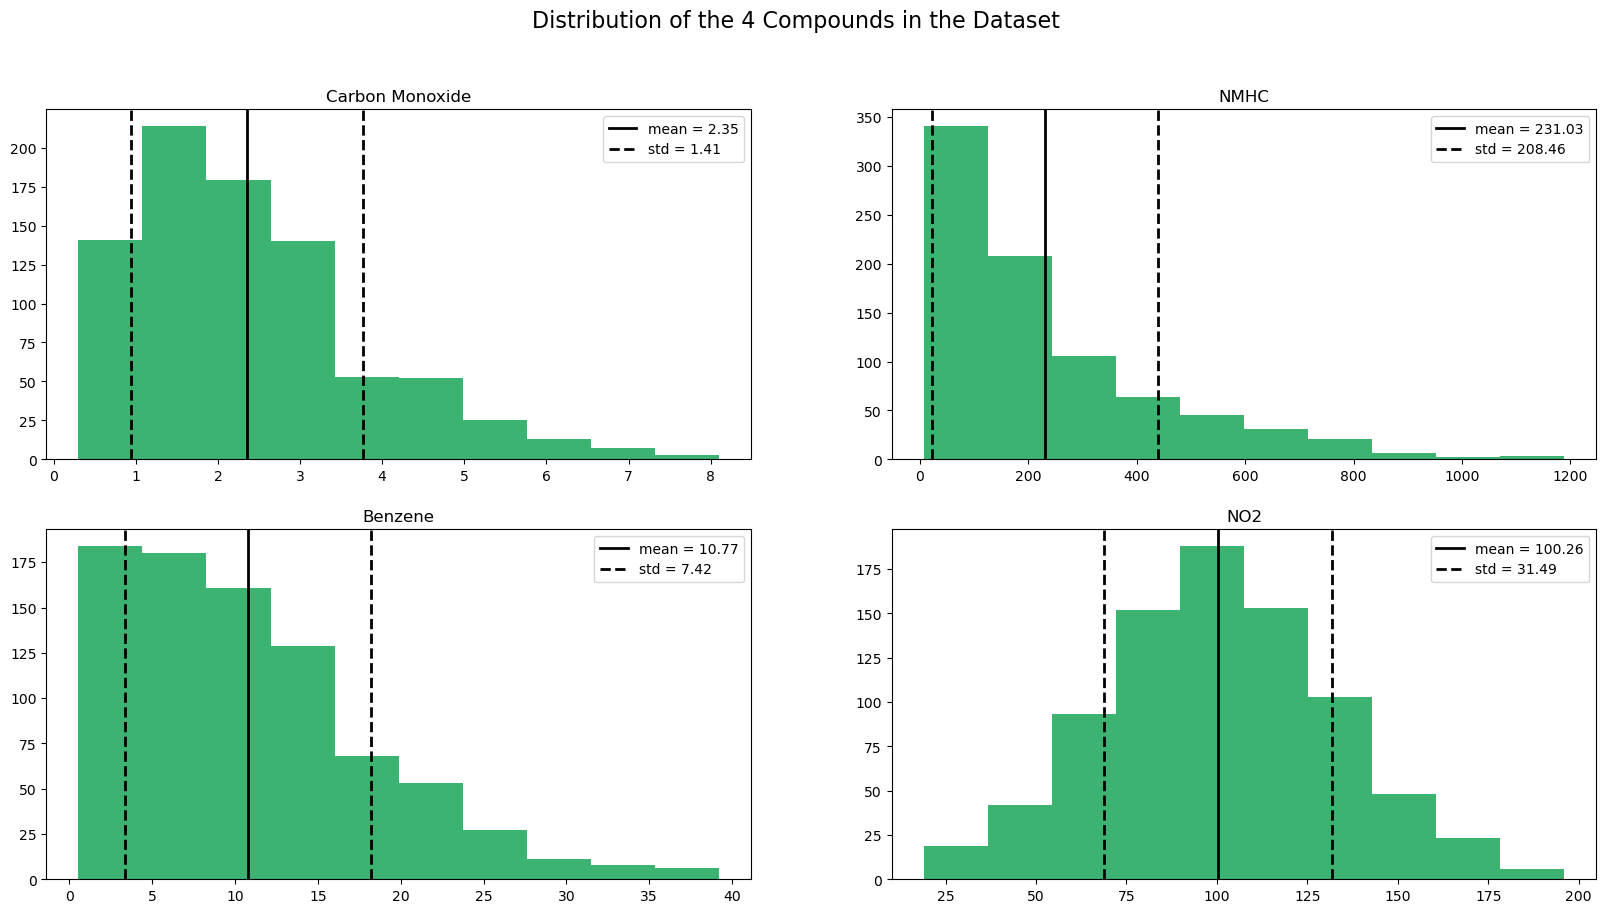

In [4]:
#Question 1: Remove rows containing missing values
df = df[df['Date'] != -200]
df = df[df['Time'] != -200]
df = df[df['CO(GT)'] != -200]
df = df[df['NMHC(GT)'] != -200]
df = df[df['C6H6(GT)'] != -200]
df = df[df['NO2(GT)'] != -200]
df = df[df['T'] != -200]
df = df[df['RH'] != -200]
df = df[df['AH'] != -200]

#Generate a 2x2 grid of subplots with a supertitle
fig, axs = plt.subplots(2,2, figsize=(20,10))
plt.suptitle("Distribution of the 4 Compounds in the Dataset",fontsize=16)

#In the first subplot, make a histogram of CO(GT), add a solid black vertical line at the mean value, and label it with the string "mean = " and the 
#string-ified mean of CO(GT) rounded to two decimal places. Repeat this process with two black dashed lines located one stdev +- the mean labelled with the 
#value of the stdev 
axs[0,0].hist(x=df['CO(GT)'], color='mediumseagreen')
axs[0,0].axvline(x=df['CO(GT)'].mean(), lw=2, color='black',label = 'mean = ' + str(round(df['CO(GT)'].mean(),2)))
axs[0,0].axvline(x=(df['CO(GT)'].mean() + df['CO(GT)'].std()),lw=2, color='black',ls='--',label = 'std = ' + str(round(df['CO(GT)'].std(),2)))
axs[0,0].axvline(x=(df['CO(GT)'].mean() - df['CO(GT)'].std()),lw=2, color='black',ls='--')
axs[0,0].legend()
axs[0,0].set_title('Carbon Monoxide')

#In the 2nd subplot, repeat this process with NMHC(GT)
axs[0,1].hist(x=df['NMHC(GT)'], color='mediumseagreen')
axs[0,1].axvline(x=df['NMHC(GT)'].mean(), lw=2, color='black',label = 'mean = ' + str(round(df['NMHC(GT)'].mean(),2)))
axs[0,1].axvline(x=(df['NMHC(GT)'].mean() + df['NMHC(GT)'].std()),lw=2, color='black',ls='--', label = 'std = ' + str(round(df['NMHC(GT)'].std(),2)))
axs[0,1].axvline(x=(df['NMHC(GT)'].mean() - df['NMHC(GT)'].std()),lw=2, color='black',ls='--')
axs[0,1].legend()
axs[0,1].set_title('NMHC')

#In the 3rd subplot, repeat this process with C6H6(GT)
axs[1,0].hist(x=df['C6H6(GT)'], color='mediumseagreen')
axs[1,0].axvline(x=df['C6H6(GT)'].mean(), lw=2, color='black',label = 'mean = ' + str(round(df['C6H6(GT)'].mean(),2)))
axs[1,0].axvline(x=(df['C6H6(GT)'].mean() + df['C6H6(GT)'].std()),lw=2, color='black',ls='--',label = 'std = ' + str(round(df['C6H6(GT)'].std(),2)))
axs[1,0].axvline(x=(df['C6H6(GT)'].mean() - df['C6H6(GT)'].std()),lw=2, color='black',ls='--')
axs[1,0].legend()
axs[1,0].set_title('Benzene')

#In the 4th subplot, repeat this process with NO2(GT)
axs[1,1].hist(x=df['NO2(GT)'], color='mediumseagreen')
axs[1,1].axvline(x=df['NO2(GT)'].mean(), lw=2, color='black',label = 'mean = ' + str(round(df['NO2(GT)'].mean(),2)))
axs[1,1].axvline(x=(df['NO2(GT)'].mean() + df['NO2(GT)'].std()),lw=2, color='black',ls='--',label = 'std = ' + str(round(df['NO2(GT)'].std(),2)))
axs[1,1].axvline(x=(df['NO2(GT)'].mean() - df['NO2(GT)'].std()),lw=2, color='black',ls='--')
axs[1,1].legend()
axs[1,1].set_title('NO2')


The time window with the highest concentration of CO is [18,21]
The time window with the highest concentration of NMHC is [18,21]
The time window with the highest concentration of C6H6 is [18,21]
The time window with the highest concentration of NO2 is [18,21]


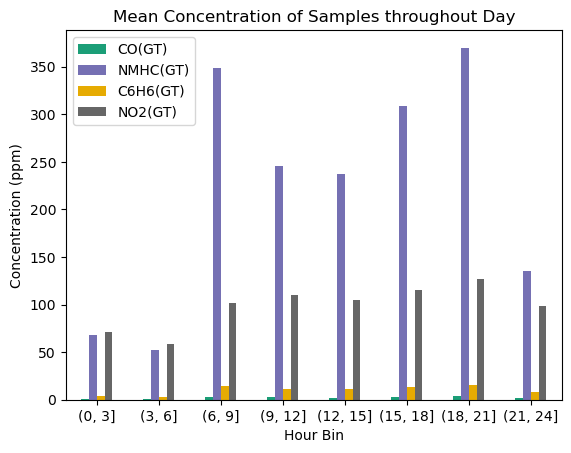

In [5]:
#Question 2 
#This below line of code converts the time column into a format that is able to processed by pd.cut 
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour 
#Use pd.cut, as we had in one of the class lectures, to make a new column called 'Hour Bin' and bin the hours into 8 groups of 3 hours each.
df['Hour Bin'] = pd.cut(df['Hour'], [0,3,6,9,12,15,18,21,24])
#Make a new dataframe called df2 which is the original dataframe grouped by the new 'Hour Bin' column, 
#and each cell is the mean of the values for each hour bin 
df2 = df.groupby(df['Hour Bin']).mean(numeric_only=True).reset_index()

#Using the pandas df.plot functionality, plot a bar plot made up of all rows of df2 and columns 0,1,2,3,4. Specify that the x axis is the 'Hour Bin' column
df2.iloc[:,[0,1,2,3,4]].plot(kind='bar', x='Hour Bin', width=0.5, title = 'Mean Concentration of Samples throughout Day',
                             colormap='Dark2', ylabel='Concentration (ppm)', rot=0) #specify the color map, y-axis label, and rotate the x-tick labels

print("The time window with the highest concentration of CO is [18,21]")
print("The time window with the highest concentration of NMHC is [18,21]")
print("The time window with the highest concentration of C6H6 is [18,21]")
print("The time window with the highest concentration of NO2 is [18,21]")

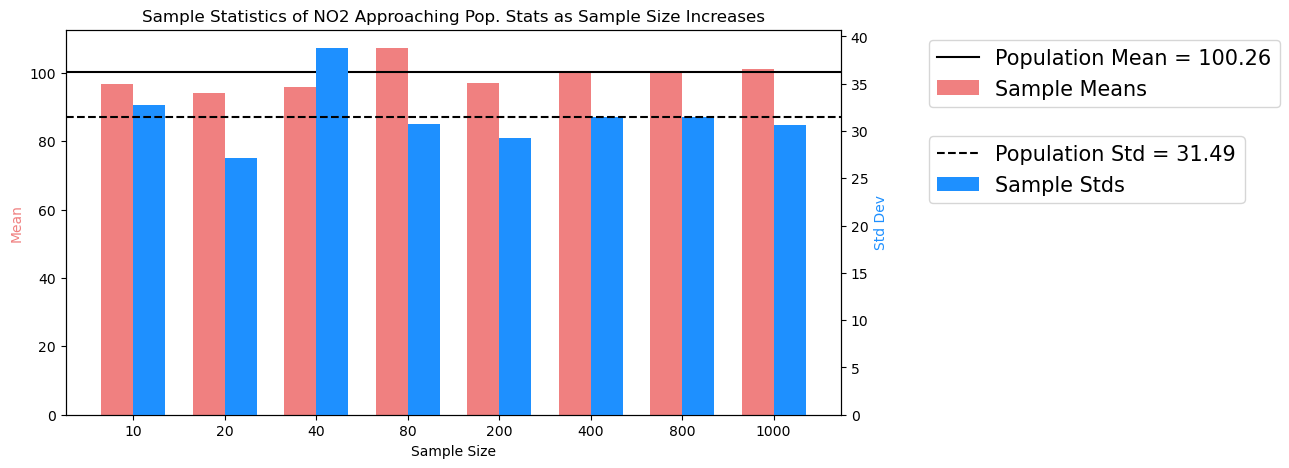

In [6]:
#Question 3
#Part 1- NO2
#Define variables for NO2 for the population mean and std
NO2_pop_mean = df['NO2(GT)'].mean()
NO2_pop_std = df['NO2(GT)'].std()

#Define objects for random samples of the NO2 column using the .sample() 
NO2_rs_10 = df['NO2(GT)'].sample(n=10)
NO2_rs_20 = df['NO2(GT)'].sample(n=20)
NO2_rs_40 = df['NO2(GT)'].sample(n=40)
NO2_rs_80 = df['NO2(GT)'].sample(n=80)
NO2_rs_200 = df['NO2(GT)'].sample(n=200)
NO2_rs_400 = df['NO2(GT)'].sample(n=400)
NO2_rs_800 = df['NO2(GT)'].sample(n=800)
NO2_rs_1000 = df['NO2(GT)'].sample(n=1000, replace=True)

#Create lists of the x and y variables for the plot
sample_sizes =  ['10','20','40','80','200','400','800','1000']
sample_means = [NO2_rs_10.mean(),NO2_rs_20.mean(),NO2_rs_40.mean(),NO2_rs_80.mean(),NO2_rs_200.mean(),NO2_rs_400.mean(),NO2_rs_800.mean(),NO2_rs_1000.mean()]
sample_stds = [NO2_rs_10.std(),NO2_rs_20.std(), NO2_rs_40.std(), NO2_rs_80.std(), NO2_rs_200.std(), NO2_rs_400.std(), NO2_rs_800.std(),NO2_rs_1000.std()]

#Some definitions for the plot 
ind=np.arange(8)
width=0.35

#Define the plot, give it a title, and two sets of y-axes, one for Mean in light coral
#and one for Std in blue. .twinx() allows both y axes to share the same x-axes
fig, ax1 = plt.subplots(figsize=(10,5))
plt.title('Sample Statistics of NO2 Approaching Pop. Stats as Sample Size Increases')
ax2=ax1.twinx()
ax1.set_xlabel('Sample Size')
ax1.set_ylabel('Mean', color='lightcoral')
ax2.set_ylabel('Std Dev', color='dodgerBlue')

#Plot the bars for sample means and sample stds with their appropraite colors
#and with proper indentation and width so that they are offset and not stacked on 
#one another. 
ax1.bar(ind, height=sample_means,color='lightcoral', width=width, label='Sample Means')
ax2.bar(ind + width, height=sample_stds, color='dodgerblue',width=width, label='Sample Stds')
plt.xticks(ind + width/2, sample_sizes) #change the x-tick labels to the strings representing sample sizes
#Add a solid black horizontal line for the population mean
#and a dashed black horizontal line for the population std
ax1.axhline(y=NO2_pop_mean, color='black', label='Population Mean = ' + str(round(NO2_pop_mean,2)))
ax2.axhline(y=NO2_pop_std, color='black', label='Population Std = ' + str(round(NO2_pop_std,2)),ls='--')

ax1.legend(bbox_to_anchor=(1.1,1), loc="upper left", fontsize=15, ncol=1)
ax2.legend(bbox_to_anchor=(1.1,0.75), loc="upper left", fontsize=15, ncol=1)

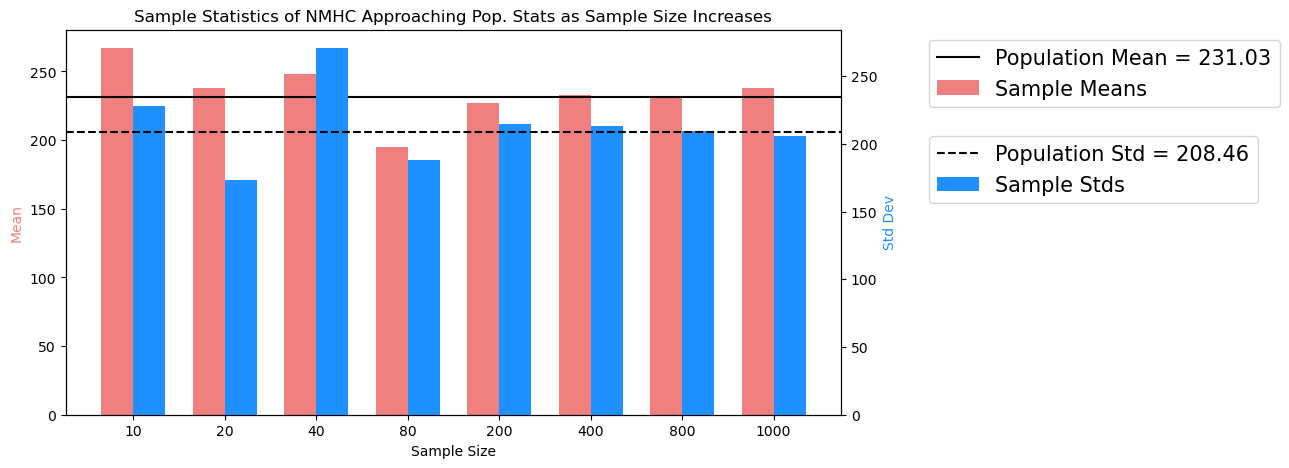

In [8]:
#Question 3 Part 2 - Repeat for NMHC
#Define variables for NO2 for the population mean and std
NMHC_pop_mean = df['NMHC(GT)'].mean()
NMHC_pop_std = df['NMHC(GT)'].std()

#Define objects for random samples of the NO2 column using the .sample() 
NMHC_rs_10 = df['NMHC(GT)'].sample(n=10)
NMHC_rs_20 = df['NMHC(GT)'].sample(n=20)
NMHC_rs_40 = df['NMHC(GT)'].sample(n=40)
NMHC_rs_80 = df['NMHC(GT)'].sample(n=80)
NMHC_rs_200 = df['NMHC(GT)'].sample(n=200)
NMHC_rs_400 = df['NMHC(GT)'].sample(n=400)
NMHC_rs_800 = df['NMHC(GT)'].sample(n=800)
NMHC_rs_1000 = df['NMHC(GT)'].sample(n=1000, replace=True)

#Create lists of the x and y variables for the plot
sample_sizes =  ['10','20','40','80','200','400','800','1000']
sample_means = [NMHC_rs_10.mean(),NMHC_rs_20.mean(),NMHC_rs_40.mean(),NMHC_rs_80.mean(),NMHC_rs_200.mean(),NMHC_rs_400.mean(),NMHC_rs_800.mean(),NMHC_rs_1000.mean()]
sample_stds = [NMHC_rs_10.std(),NMHC_rs_20.std(), NMHC_rs_40.std(), NMHC_rs_80.std(), NMHC_rs_200.std(), NMHC_rs_400.std(), NMHC_rs_800.std(),NMHC_rs_1000.std()]

#Some definitions for the plot 
ind=np.arange(8)
width=0.35

#Define the plot, give it a title, and two sets of y-axes, one for Mean in light coral
#and one for Std in blue. .twinx() allows both y axes to share the same x-axes
fig, ax1 = plt.subplots(figsize=(10,5))
plt.title('Sample Statistics of NMHC Approaching Pop. Stats as Sample Size Increases')
ax2=ax1.twinx()
ax1.set_xlabel('Sample Size')
ax1.set_ylabel('Mean', color='lightcoral')
ax2.set_ylabel('Std Dev', color='dodgerBlue')

#Plot the bars for sample means and sample stds with their appropraite colors
#and with proper indentation and width so that they are offset and not stacked on 
#one another. 
ax1.bar(ind, height=sample_means,color='lightcoral', width=width, label='Sample Means')
ax2.bar(ind + width, height=sample_stds, color='dodgerblue',width=width, label='Sample Stds')
plt.xticks(ind + width/2, sample_sizes) 
#Add a solid black horizontal line for the population mean
#and a dashed black horizontal line for the population std
ax1.axhline(y=NMHC_pop_mean, color='black', label='Population Mean = ' + str(round(NMHC_pop_mean,2)))
ax2.axhline(y=NMHC_pop_std, color='black', label='Population Std = ' + str(round(NMHC_pop_std,2)),ls='--')

ax1.legend(bbox_to_anchor=(1.1,1), loc="upper left", fontsize=15, ncol=1)
ax2.legend(bbox_to_anchor=(1.1,0.75), loc="upper left", fontsize=15, ncol=1)

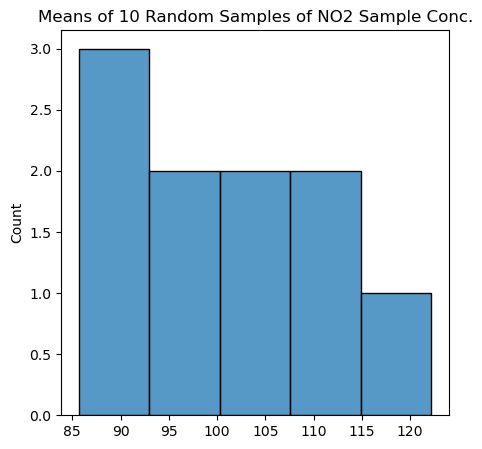

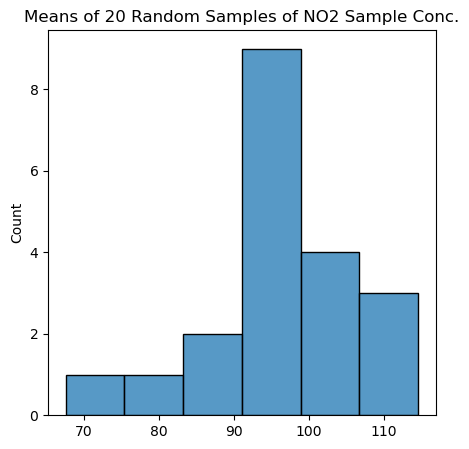

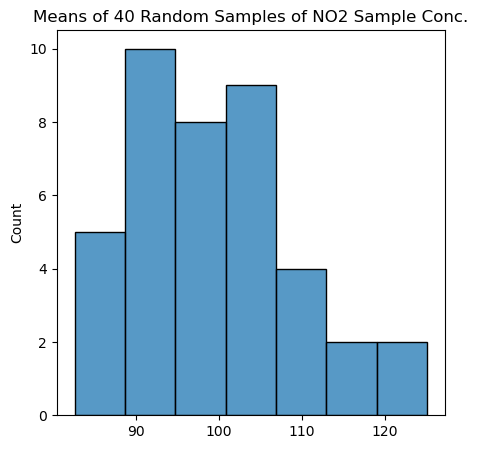

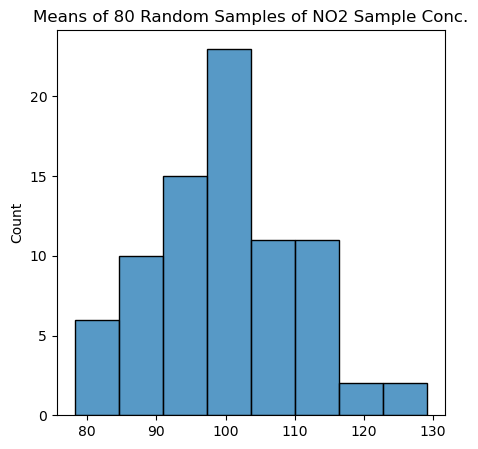

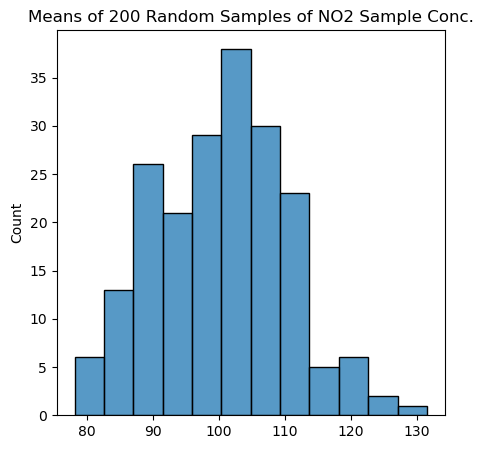

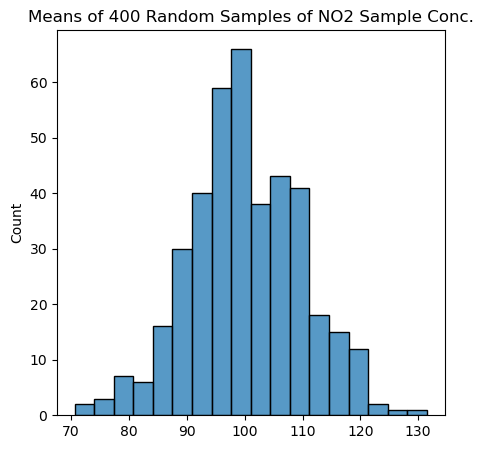

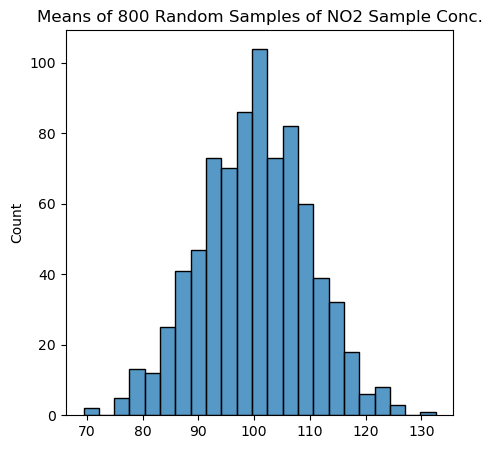

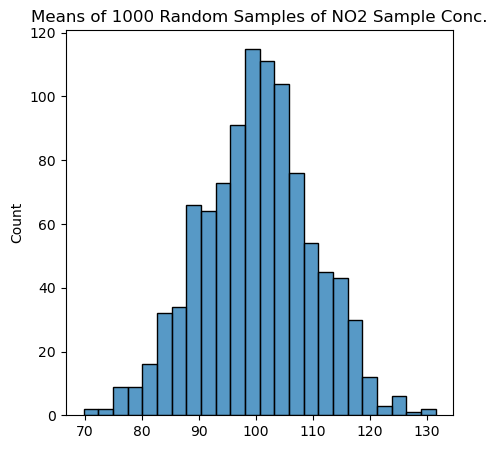

In [12]:
#Question 4 - NO2 Distributions
#Iterate through a list of the number of samples I want to randomly sample 
for j in [10,20,40,80,200,400,800,1000]:
    means = [] #redefine means as a blank list at the start of every for loop
    for i in range(j):
        sample = df['NO2(GT)'].sample(10, replace=True)
        means.append(sample.mean()) #sample j number of times and append the mean of the 
    fig, ax = plt.subplots(figsize=(5,5))
    sns.histplot(means, ax=ax).set(title = 'Means of ' + str(j) + ' Random Samples of NO2 Sample Conc.')

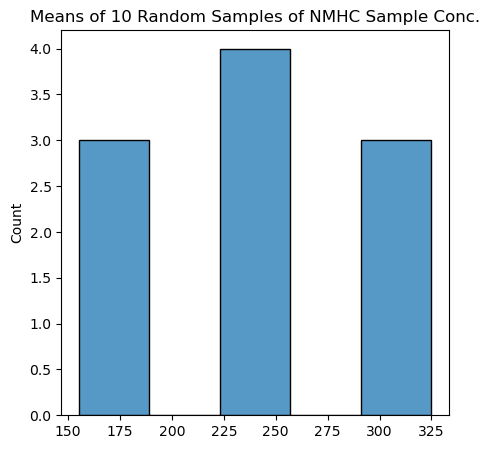

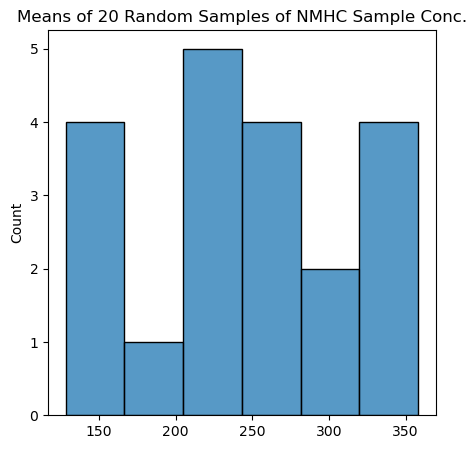

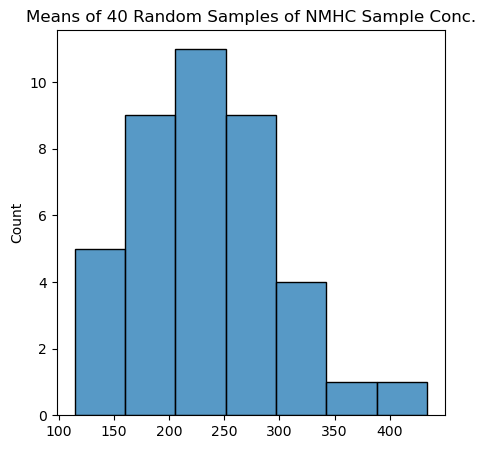

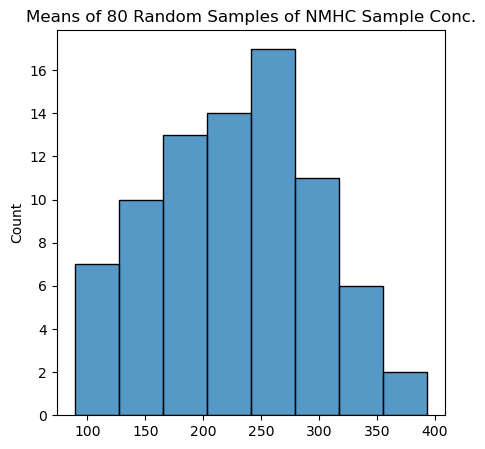

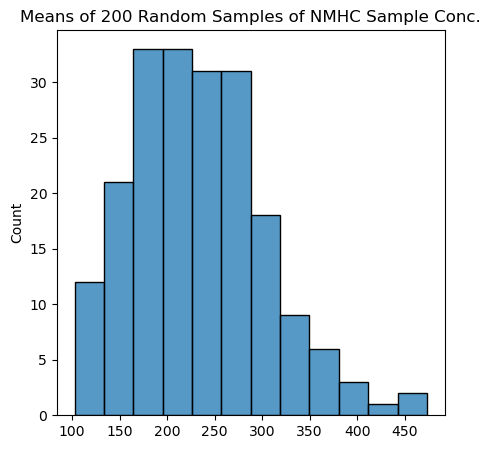

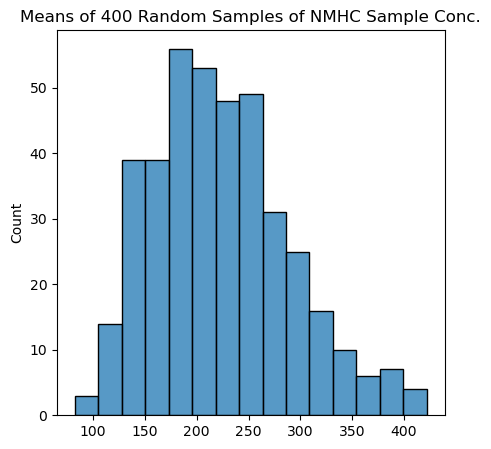

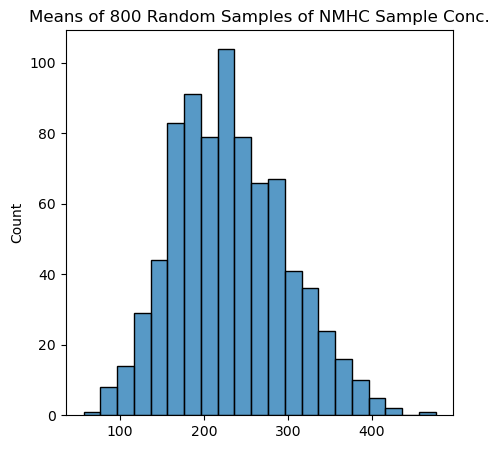

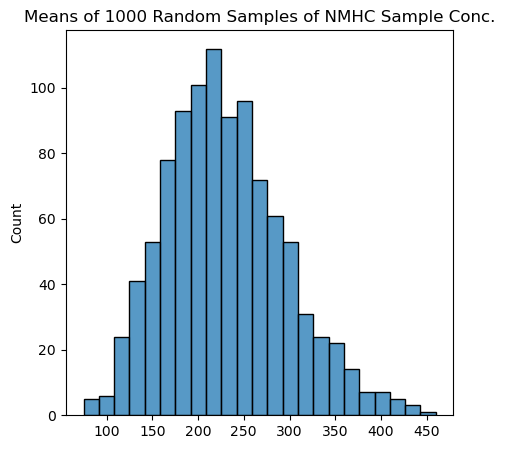

In [13]:
#Question 4 - Part 2, NMHC
for j in [10,20,40,80,200,400,800,1000]:
    means = []
    for i in range(j):
        sample = df['NMHC(GT)'].sample(10, replace=True)
        means.append(sample.mean())
    fig, ax = plt.subplots(figsize=(5,5))
    sns.histplot(means, ax=ax).set(title = 'Means of ' + str(j) + ' Random Samples of NMHC Sample Conc.')


As the number of sample means increases, the distribution approaches a normal distribution due to the central limit theory which states that as you increase the number of samples, the distribution of their means approximates a normal distribution and the mean approaches the popultaion mean. 